In [13]:
# import libraries
import numpy as np
from keras.models import Model
from keras.layers import Dense
from keras import Input
from keras.layers import Concatenate
import matplotlib.pyplot as plt

In [14]:
# fix random seed
seed = 7
np.random.seed(seed)

1. Multiple inputs and multiple outputs network

In [3]:
# create dataset
N = 1000

X_train1 = np.linspace(0, 1, N)
X_train2 = X_train1**2

y_train1 = np.sin(2*np.pi*X_train1)
y_train2 = np.exp(X_train2)

X_val1 = np.sort(np.random.rand(100))
X_val2 = X_val1**2

y_val1 = np.sin(2*np.pi*X_val1)
y_val2 = np.exp(X_val2)

In [4]:
# create model

# input layers
x0 = [Input(shape = (1, ))]*2

# hidden layers
x1 = [Dense(20, input_dim = 1, activation = "relu")(x) for x in x0]
x2 = [Dense(20, activation = "selu")(x) for x in x1]
x3 = Concatenate()(x2)
x4 = Dense(20, activation = "relu")(x3)
x5 = Dense(20, activation = "relu")(x4)
x6_sin = Dense(20, activation = "relu")(x5)
x6_exp = Dense(30, activation = "exponential")(x5)
x7_sin = Dense(20, activation = "relu")(x6_sin)
x7_exp = Dense(30, activation = "exponential")(x6_exp)
x8_sin = Dense(1)(x7_sin)
x8_exp = Dense(1)(x7_exp)

model = Model(inputs = x0, outputs = [x8_sin, x8_exp])

# compile and fit model
model.compile(optimizer = "rmsprop", loss = ["mse", "mse"], loss_weights = [1, 1], metrics = ["mse", 'mse'])
model.fit([X_train1, X_train2], [y_train1, y_train2], epochs = 300, batch_size = 32,
          validation_data = ([X_val1, X_val2], [y_val1, y_val2]))

c:\Users\natha\Documents\GitHub\4th year Polytech\Deep Learning\env_deep_learning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - dense_10_loss: 0.4227 - dense_10_mse: 0.4228 - dense_11_loss: 20.4456 - dense_11_mse: 20.4575 - loss: 20.8803 - val_dense_10_loss: 0.2841 - val_dense_10_mse: 0.3406 - val_dense_11_loss: 0.0350 - val_dense_11_mse: 0.0285 - val_loss: 0.3692
Epoch 2/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - dense_10_loss: 0.3369 - dense_10_mse: 0.3367 - dense_11_loss: 0.0174 - dense_11_mse: 0.0173 - loss: 0.3541 - val_dense_10_loss: 0.2334 - val_dense_10_mse: 0.2452 - val_dense_11_loss: 0.0726 - val_dense_11_mse: 0.0514 - val_loss: 0.2966
Epoch 3/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - dense_10_loss: 0.2445 - dense_10_mse: 0.2445 - dense_11_loss: 0.0454 - dense_11_mse: 0.0454 - loss: 0.2900 - val_dense_10_loss: 0.2267 - val_dense_10_mse: 0.1784 - val_dense_11_loss: 0.0735 - val_dense_11_mse: 0.0527 - val_loss: 0.2311
Epoch 4/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - dense_10_loss: 0.1910 - dense_10_mse: 0.1910 - dense_11_loss: 0.0554 - dense

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Text(0.5, 1.0, 'Training and validation data for sin model')

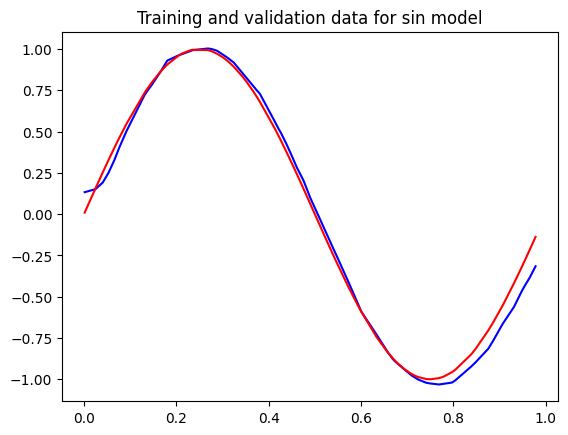

In [5]:
# Show results
[yp_sin, yp_exp] = model.predict([X_val1, X_val2])

plt.plot(X_val1, yp_sin, "b")
plt.plot(X_val1, y_val1, "r")

plt.title("Training and validation data for sin model")

Text(0.5, 1.0, 'Training and validation data for exp model')

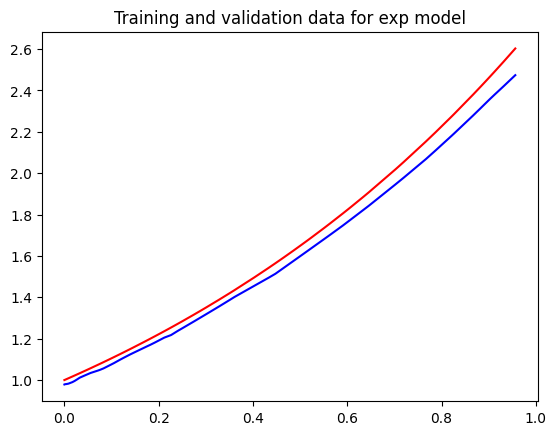

In [6]:
plt.plot(X_val2, yp_exp, "b")
plt.plot(X_val2, y_val2, "r")

plt.title("Training and validation data for exp model")

2. Residual networks (ResNet)

In [16]:
# import additional libraries

from keras.utils import plot_model

In [6]:
# Create dataset

N = 1000
X_train = np.linspace(0, 1, N)
y_train = np.sin(12*np.pi*X_train)

X_val = np.sort(np.random.rand(100))
y_val = np.sin(12*np.pi*X_val)

In [10]:
# create model

# input layer
x0 = Input(shape = (1, ))

# hidden layer

x = Dense(10, input_dim = 1, activation = "relu")(x0)
for _ in range (20) :
    x_temp = x
    x = Dense(10, activation = "relu")(x)
    x = Dense(10, activation = "relu")(x)
    x = Concatenate()([x_temp, x])

# output layer
x1 = Dense(1)(x)

# finish model
model = Model(inputs = x0, outputs = x1)

# model.summary()
plot_model(model, show_shapes = True, to_file = "model_graph_resnet.png") ;

In [11]:
# compile and fit model

model.compile(optimizer = "rmsprop", loss = "mse", metrics = ["mse"])
model.fit(X_train, y_train, epochs = 300, batch_size = 32, validation_data = (X_val, y_val))

Epoch 1/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.4856 - mse: 0.4856 - val_loss: 0.4861 - val_mse: 0.4861
Epoch 2/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4868 - mse: 0.4868 - val_loss: 0.4514 - val_mse: 0.4514
Epoch 3/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4731 - mse: 0.4731 - val_loss: 0.4467 - val_mse: 0.4467
Epoch 4/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4675 - mse: 0.4675 - val_loss: 0.4362 - val_mse: 0.4362
Epoch 5/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4386 - mse: 0.4386 - val_loss: 0.4333 - val_mse: 0.4333
Epoch 6/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4562 - mse: 0.4562 - val_loss: 0.4427 - val_mse: 0.4427
Epoch 7/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4617 - mse: 0.4617 - val_loss: 0.4363 - val_mse: 0.4363
Epoch 8/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4530 - mse: 0.4530 - val_loss: 0.4330 - val_mse: 0.4330
Epoch 9/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.44

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


Text(0.5, 1.0, 'Prediction and exact data')

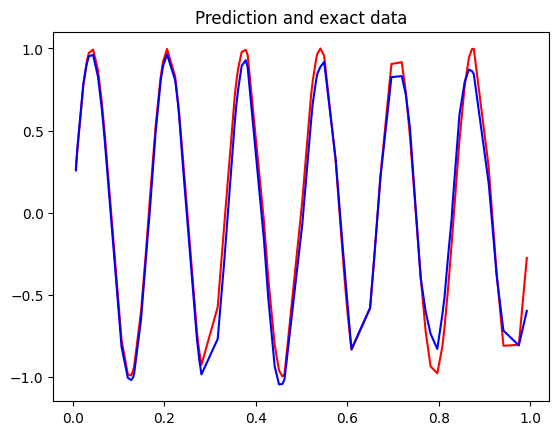

In [12]:
y_p = model.predict(X_val)

plt.plot(X_val, y_val, "r")
plt.plot(X_val, y_p, "b")
plt.title("Prediction and exact data")

Exercice

In [15]:
# Create dataset

N = 1000
X_train = np.linspace(0, 1, N)
y_train = np.sin(12*np.pi*X_train)

X_val = np.sort(np.random.rand(100))
y_val = np.sin(12*np.pi*X_val)

In [31]:
# create model

# input layer
x0 = Input(shape = (1, ))
x = x0
# hidden layer

for i in range (4) :
    x = Dense(10, activation = "relu")(x)
    x_temp1 = x
    x = Dense(10, activation = "relu")(x)
    x_temp2 = x
    x = Dense(10, activation = "relu")(x)
    x = Dense(10, activation = "relu")(x)
    x2 = Dense(10, activation = "relu")(x_temp2)
    x = Concatenate()([x, x2, x_temp1])

# output layer
x1 = Dense(1)(x)

# finish model
model = Model(inputs = x0, outputs = x1)

# model.summary()
plot_model(model, show_shapes = True, to_file = "model_graph_exercice.png") ;

In [32]:
# compile and fit model

model.compile(optimizer = "rmsprop", loss = "mse", metrics = ["mse"])
model.fit(X_train, y_train, epochs = 300, batch_size = 32, validation_data = (X_val, y_val))

Epoch 1/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.5098 - mse: 0.5098 - val_loss: 0.5306 - val_mse: 0.5306
Epoch 2/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4854 - mse: 0.4854 - val_loss: 0.5266 - val_mse: 0.5266
Epoch 3/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4852 - mse: 0.4852 - val_loss: 0.5271 - val_mse: 0.5271
Epoch 4/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5104 - mse: 0.5104 - val_loss: 0.5255 - val_mse: 0.5255
Epoch 5/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4878 - mse: 0.4878 - val_loss: 0.5201 - val_mse: 0.5201
Epoch 6/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4902 - mse: 0.4902 - val_loss: 0.5262 - val_mse: 0.5262
Epoch 7/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5059 - mse: 0.5059 - val_loss: 0.5219 - val_mse: 0.5219
Epoch 8/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4679 - mse: 0.4679 - val_loss: 0.5138 - val_mse: 0.5138
Epoch 9/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.45

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000026EF4387B00> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Text(0.5, 1.0, 'Prediction and exact data')

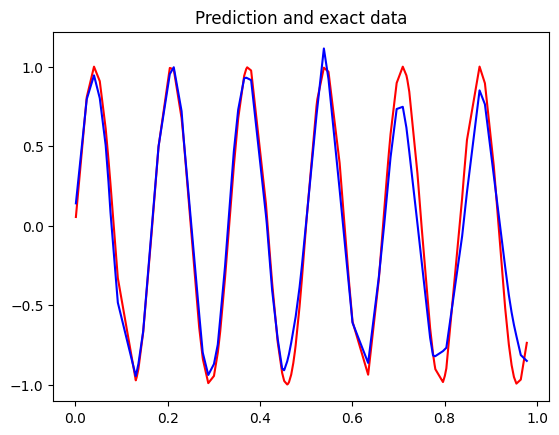

In [33]:
y_p = model.predict(X_val)

plt.plot(X_val, y_val, "r")
plt.plot(X_val, y_p, "b")
plt.title("Prediction and exact data")